# Tutorial Julia for Data Science

## 3 Statistica

Questo tutorial parla di alcuni modi per rappresentare valutazioni statistiche di dataframe in Julia

In [2]:
#=using Pkg
Pkg.add("StatsBase")
Pkg.add("RDatasets")
Pkg.add("StatsPlots")
Pkg.add("KernelDensity")
Pkg.add("Distributions")
Pkg.add("HypothesisTests")
Pkg.add("MLBase")=#

In [1]:
using Statistics
using StatsBase
using RDatasets
using Plots
using StatsPlots
using KernelDensity
using Distributions
using LinearAlgebra
using HypothesisTests
using PyCall
using MLBase
using Conda

Ogni analisi statistica parte da dei dati, noi useremo dati su durata e intervallo tra eruzioni del geyser "old faithful" nel parco di yellowstone.  
Carichiamoli

In [9]:
D = dataset("datasets","faithful")
eruptions = D[!,:Eruptions];
waittime = D[!,:Waiting];

Per comodità abbiamo anche caricato i valori delle due variabili in due array diversi.  
Avremo che per un eruzione $ x_i $ la sua durata sarà eurptions[i] e il suo tempo d'attesa (tempo tra $ x_i $ e $ x_{i-1} $ )  waittime[i]  

Usando la funhzione describe() possiamo ottenere una prima analisi grezza dei dati contenente valori statistici come mediana, massimo.

In [8]:
describe(D)

,variable,mean,min,median,max,nunique,nmissing,eltype
,Symbol,Float64,Real,Float64,Real,Nothing,Nothing,DataType
1,Eruptions,3.48778,1.6,4.0,5.1,,,Float64
2,Waiting,70.8971,43,76.0,96,,,Int64


Iniziamo ora vedere come fare dei grafici che ci mostrino come si distribuiscono i campioni, vediamo un boxplot:

┌ Warning: Keyword argument hover not supported with Plots.GRBackend().  Choose from: Set([:top_margin, :group, :background_color, :yforeground_color_text, :yguidefontcolor, :seriesalpha, :legendfontcolor, :seriescolor, :ztick_direction, :zlims, :overwrite_figure, :xguidefonthalign, :normalize, :linestyle, :xflip, :fillcolor, :ygrid, :background_color_inside, :zguidefonthalign, :bins, :yscale, :xtickfontcolor, :xguide, :fillalpha, :tick_direction, :yguidefontsize, :legendfontfamily, :foreground_color, :xtickfonthalign, :x, :ytickfontrotation, :legend, :discrete_values, :ytick_direction, :xguidefontrotation, :ribbon, :tickfontrotation, :xdiscrete_values, :legendtitle, :xgridstyle, :orientation, :gridstyle, :markersize, :camera, :xforeground_color_grid, :quiver, :zticks, :markerstrokecolor, :ztickfontrotation, :ztickfonthalign, :legendfonthalign, :xtickfontsize, :levels, :zgridstyle, :foreground_color_border, :zguidefontvalign, :marker_z, :markerstrokealpha, :markeralpha, :tickfontvalign

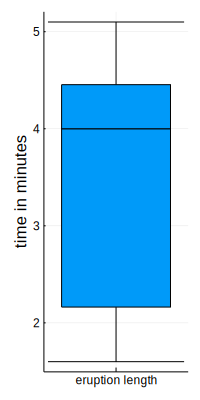

In [10]:
boxplot(["eruption length"],eruptions,legend=false,size=(200,400),whisker_width=1,ylabel="time in minutes")

Il boxplot mostra la rappresentazione per quartili dei campioni, mostrandoci come un 50% di essi siano caduti tutti nell intervallo (4,5) e che il quartile con l'intervallo più piccolo cada circa tra 4 e 4.5.  
Proviamo ad approfondire con un istogramma

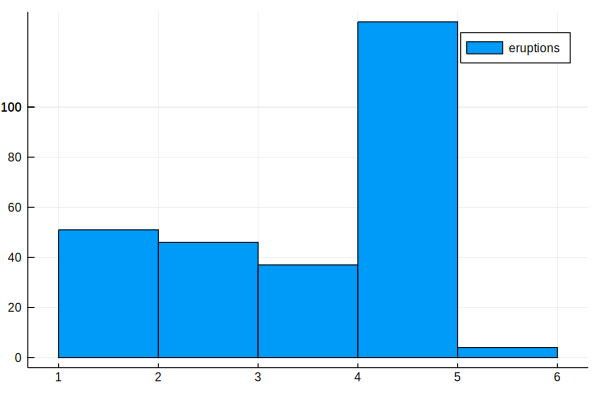

In [11]:
histogram(eruptions,label="eruptions")

Anche questo grafico suggerisce un alta densità di campioni nell intervallo (4,5),  
diminuendo manualmente la larghezza delle barre (Julia di default usa incrementi unitari)  scopriamo che  

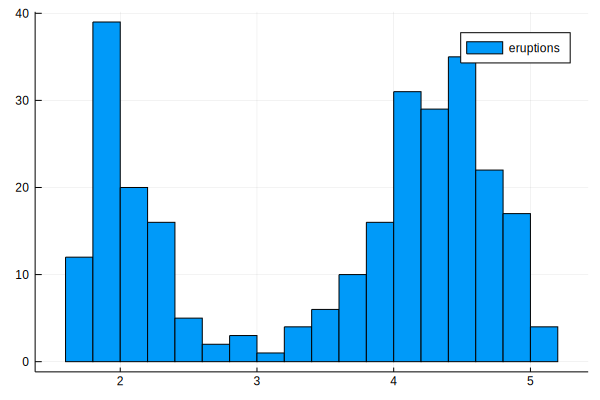

In [13]:
histogram(eruptions,bins=:sqrt,label="eruptions")

Un intervallo molto denso è quello tra 1.8 e 2  
Per scoprire più facilmente intervalli densi circondati da intervalli sparsi, possiamo appaiare alll'istogramma una proiezione 
della funzione di stima di kernel della densità: 

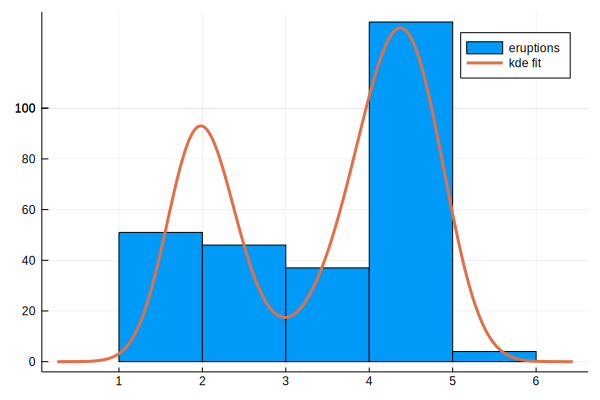

In [14]:
p=kde(eruptions)
histogram(eruptions,label="eruptions")
plot!(p.x,p.density .* length(eruptions), linewidth=3,color=2,label="kde fit")

NB: cambio di scala sulla kernel  

Che appunto ci fa già vedere quello che abbiamo visto dopo:

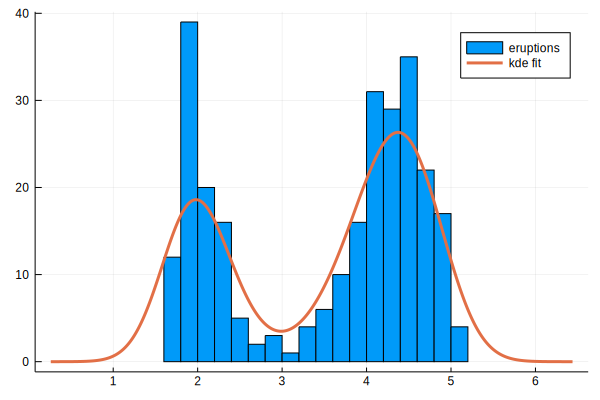

In [15]:
histogram(eruptions,bins=:sqrt,label="eruptions")
plot!(p.x,p.density .* length(eruptions) .*0.2, linewidth=3,color=2,label="kde fit") # nb of elements*bin width

## Distribuzioni
Vediamo ora il grafo a campana della normale

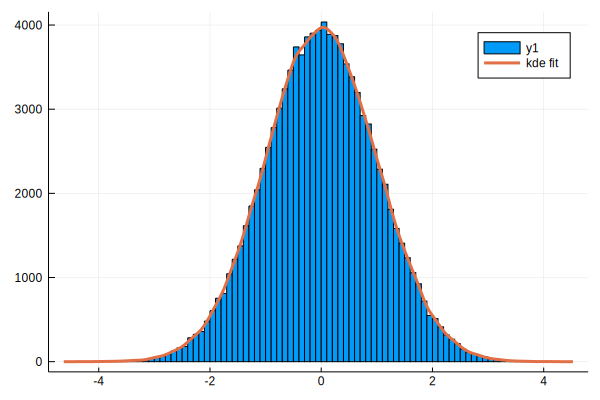

In [16]:
myrandomvector = randn(100_000)
histogram(myrandomvector)
p=kde(myrandomvector)
plot!(p.x,p.density .* length(myrandomvector) .*0.1, linewidth=3,color=2,label="kde fit") # nb of elements*bin width

Possiamo fare la stessa cosa più comodamente usando il package Distributions:

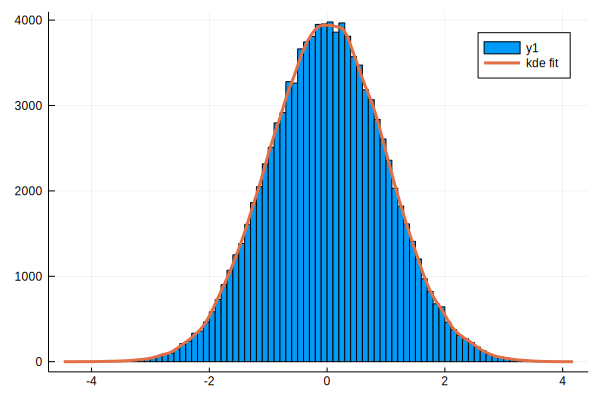

In [17]:
# possiam fare la stessa cosa usando pkg distributionsn e dichiarando che distr usiamo
d = Normal()
myrandomvector = rand(d,100000)
histogram(myrandomvector)
p=kde(myrandomvector)
plot!(p.x,p.density .* length(myrandomvector) .*0.1, linewidth=3,color=2,label="kde fit") # nb of elements*bin width

Vediamo ora una comparazione tra distribuzioni t con la normale all aumento dei gradi di libertà della t:

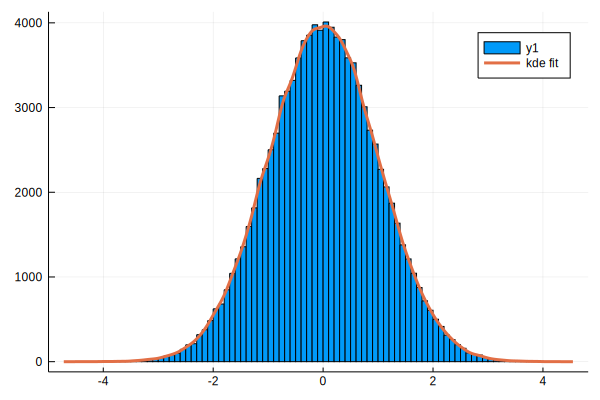

In [19]:
# possiam fare la stessa cosa usando pkg distributionsn e dichiarando che distr usiamo
d = Normal()
myrandomvector = rand(d,100000)
histogram(myrandomvector)
p=kde(myrandomvector)
plot!(p.x,p.density .* length(myrandomvector) .*0.1, linewidth=3,color=2,label="kde fit") # nb of elements*bin width

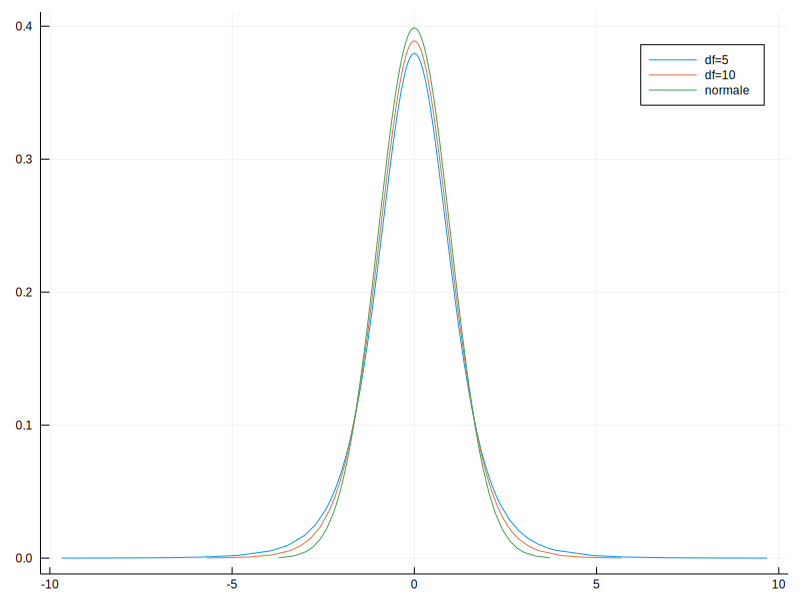

In [22]:
plot(TDist(5), label="df=5", size=(800, 600))
plot!(TDist(10), label="df=10")
plot!(Normal(), label="normale")
# distribuzione t si avvicina a normale all aumentare dei gradi di libertà

Nel caso di modelli di regressione generici possiamo ritrovarci a trattare binomiali, possiamo plottare anche queste in Julia: 

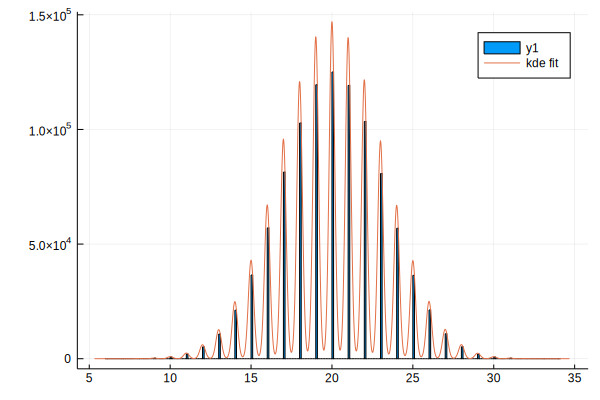

In [23]:
b = Binomial(40) 
myrandomvector = rand(b,1000000)
histogram(myrandomvector)
p=kde(myrandomvector)
plot!(p.x,p.density .* length(myrandomvector) .*0.5,color=2,label="kde fit") # nb of elements*bin width

Julia ci permette anche a provare il fitting di una determinata distribuzione ad un set di dati al volo:

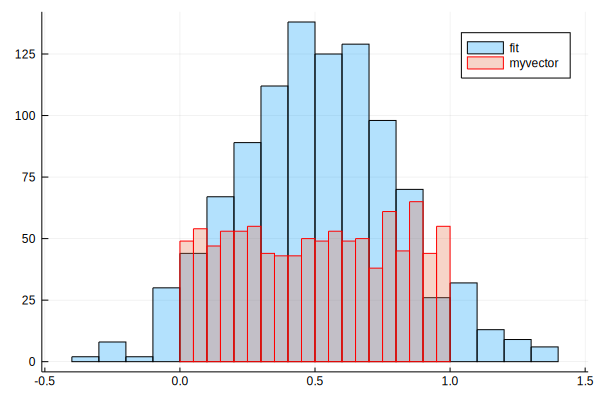

In [24]:
# fitting di valori a una distribuzione
x = rand(1000)
d = fit(Normal, x)
myrandomvector = rand(d,1000)
histogram(myrandomvector,nbins=20,fillalpha=0.3,label="fit")
histogram!(x,nbins=20,linecolor = :red,fillalpha=0.3,label="myvector")

Il fitting, si vede da subito, non è un granche.  
Difatti rand prende valori casuali equiprobabili tra 1 e 0, quindi la media ci aspettiamo sia attorno  a 0.5, consa non vera per la normale.

## T test
Abbiamo funzioni per fare test t, vediamo una funzione per un test t di esempio:  
La funzione testa se la variabile che ha generato i dati che gli diamo possa avere media non nulla, ovvero:  
$ H_1 $ : μ $ \ne $ 0 vs $ H_0 $ : μ $ = $ 0

In [25]:
myrandomvector = randn(1000)
OneSampleTTest(myrandomvector)

One sample t-test
-----------------
Population details:
    parameter of interest:   Mean
    value under h_0:         0
    point estimate:          0.02678331661356662
    95% confidence interval: (-0.0342, 0.0878)

Test summary:
    outcome with 95% confidence: fail to reject h_0
    two-sided p-value:           0.3889

Details:
    number of observations:   1000
    t-statistic:              0.861929725959623
    degrees of freedom:       999
    empirical standard error: 0.03107366622464217


La funzione ci ritorna risultato, probabilità stimata, intervalli di confidenzi a lvl 95 della stima e se il test ha rifiutato o meno l'ipoitesi nulla.

## Correlazioni

Possiamo usare scipy per ottenere correlazioni tra le nostre variabili  
Se non abbiamo scipy installato, possiamo farlo da Julia usando Conda:

In [28]:
#=
Pkg.add("Conda")
using Conda
Conda.add("scipy")=#

Dopodichè possiamo usare il modulo stats

In [29]:
scipy_stats = pyimport("scipy.stats")
@show scipy_stats.spearmanr(eruptions,waittime)
@show scipy_stats.pearsonr(eruptions,waittime)

scipy_stats.spearmanr(eruptions, waittime) = (0.7779720576516121, 1.989541990656138e-56)
scipy_stats.pearsonr(eruptions, waittime) = (0.9008111683218126, 8.129958506620234e-100)


(0.9008111683218126, 8.129958506620234e-100)

Possiam,o ottenere correlazione con cor

In [30]:
cor(eruptions,waittime)

0.900811168321813

E correlazione di spearman con 

In [31]:
corspearman(eruptions,waittime)

0.7779720576516121

Le correlazioni sono entrambe alte, il che suggerisce una relazinoe tra le due variabili.  
Vediamo uno scatterplot tra essi

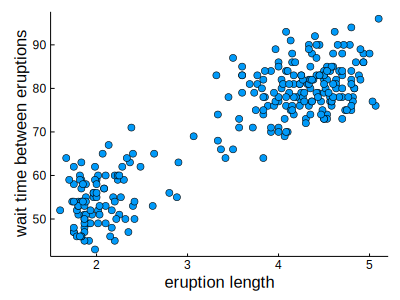

In [32]:
scatter(eruptions,waittime,xlabel="eruption length",
    ylabel="wait time between eruptions",legend=false,grid=false,size=(400,300))

In pratica, se aspettiamo tanto per un eruzione, è probabile che l'eruzione sarà più lunga.

## Matrici di confusione

una confusion matrix è una matrice spesso usata per descrivere performance di un modello di classificazione su un data set di cui sappiamo i veri valori, vediamo un esempio

| n = 165 | **Predicted NO** | **Predicted YES**|
|---|---|---|
|**Actual NO**|50|10|
|**Actual YES**|5|100|

questa matrice ci dice che, ad esempio, il modello, usato su questo campione di 165 elementi, aveva predetto NO su 55 elementi, dei quali 5 erano, in realtà YES   

Possiamo realizzarle in Julia

In [34]:
gt = [1, 1, 1, 1, 1, 1, 1, 2]
pred = [1, 1, 2, 2, 1, 1, 1, 1]
C = confusmat(2, gt, pred)   # compute confusion matrix
C ./ sum(C, dims=2)   # normalize per class
sum(diag(C)) / length(gt)  # compute correct rate from confusion matrix
correctrate(gt, pred)
C = confusmat(2, gt, pred)

2×2 Array{Int64,2}:
 5  2
 1  0

## AUC

AUC è un parametro che giudica l'accuratezza di un modello per la classificazione binaria, possiamo vederlo da Julia

In [35]:
#gt = [1, 1, 1, 1, 1, 1, 1, 0];
#pred = [1, 1, 0, 0, 1, 1, 1, 1]
ROC = MLBase.roc(gt,pred)
recall(ROC)
precision(ROC)

1.0